# Перед тем как мы начнем


В двух словах про Python

In [2]:
print("Hello world")


Hello world


In [2]:
# Комментарий
# Назначеие переменных

my_var = 100


In [145]:
if my_var > 3:
    print("This is more than 3!")
else:
    print("Not yet")

This is more than 3!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [146]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [147]:
my_function(my_var)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [148]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [149]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [150]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [151]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [152]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [153]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Мы видим, что в таблице нет пустых значений



In [154]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [155]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281



Самую высокую корреляцию имеют MonthlyIncome и JobLevel с коэффициентом 0.9503. То есть, чем выше уровень, тем больше ежемесячных доход.

Также ысокую корреляцию имеют JobLevel и TotalWorkingYears с коэффициентом 0.7822. Чем больше рабочий стаж, тем выше уровень.

Age и Job Level - 0,509. Чем старше человек, тем выше у него должность.
Age и Monthly Income - 0.498. Чем старше человек, тем выше у него ЗП.





In [156]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['Attrition'].nunique()

2

In [157]:
# Как мы с вами только что убедились, есть только два гендера

In [158]:
# Теперь глянем, что это за гендеры?
df_hr['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [178]:

df_hr['Attrition'].count()

1470

In [208]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


##  Сейчас будет чуть сложнее

In [209]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   




Тут мы имеем: 
* int64

* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [210]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='MonthlyIncome'>

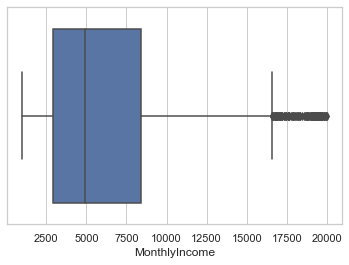

In [211]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["MonthlyIncome"])

In [212]:
# Видим, что распределение явно смещенное, все выбросы справа
# Что это за распределение? 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей

Text(0, 0.5, 'Amount of employees')

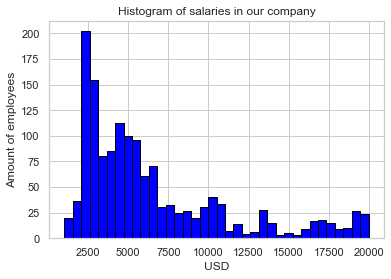

In [213]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [214]:
# Видим, что распределение похоже на Лог-нормальное, 
# но мы его еще не проходили, поэтому ничего по нему проверить не можем, 
# а просто степенно ждем пары по статистике. 

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [215]:
import numpy as np

In [216]:
# Среднее значение по ежемесячному доходу
np.mean(df_hr.MonthlyIncome)

6502.931292517007

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [217]:
# Variance (дисперсия) зарплат
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [218]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [219]:
3*np.std(df_hr.MonthlyIncome)

14119.065494469012

In [220]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?

# Сделаем подвыборку из выборки

In [228]:
# Выделим в отдельные массивы сотрудников с разными Attrition

df_hr_g1 = df_hr[df_hr['Attrition'] == 'Yes']
df_hr_g0 = df_hr[df_hr['Attrition'] == 'No'
                ]

df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


In [229]:
df_hr_g0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


In [230]:

print("Count of employee with Attrition Status 'Yes' is {}, for Status 'No' is {} ".format(len(df_hr_g1),
                                                                                           len(df_hr_g0)))

Count of employee with Attrition Status 'Yes' is 237, for Status 'No' is 1233 


In [235]:
# Выделим в отдельные массивы сотрудников с разными MaritalStatus
df_hr_g3 = df_hr[df_hr['MaritalStatus'] == 'Single']
df_hr_g4 = df_hr[df_hr['MaritalStatus'] == 'Married']
df_hr_g5 = df_hr[df_hr['MaritalStatus'] == 'Divorced']

In [236]:

print("Median of Monthly Income for Single employee \
is {}, for Married is {} and for Divorced is {} ".format(np.median(df_hr_g3.MonthlyIncome),
                                                         np.median(df_hr_g4.MonthlyIncome),
                                                         np.median(df_hr_g5.MonthlyIncome) ))

Median of Monthly Income for Single employee is 4536.0, for Married is 5204.0 and for Divorced is 5131.0 


Text(0.5, 1.0, 'BoxPlot of Monthly Income for Single employee')

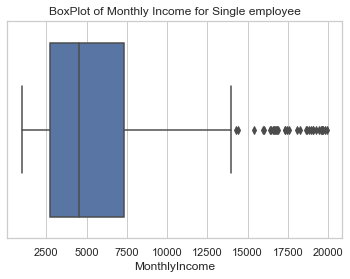

In [237]:
sns.boxplot(x=df_hr_g3["MonthlyIncome"])
plt.title('BoxPlot of Monthly Income for Single employee')

Text(0.5, 1.0, 'BoxPlot of Monthly Income for Married employee')

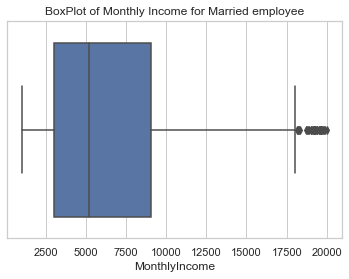

In [238]:
sns.boxplot(x=df_hr_g4["MonthlyIncome"])
plt.title('BoxPlot of Monthly Income for Married employee')

Text(0.5, 1.0, 'BoxPlot of Monthly Income for Divorced employee')

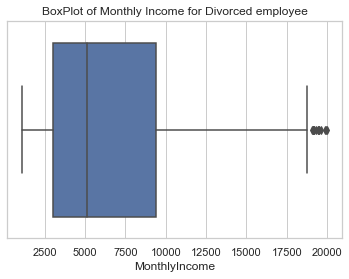

In [239]:
sns.boxplot(x=df_hr_g5["MonthlyIncome"])
plt.title('BoxPlot of Monthly Income for Divorced employee')

Text(0, 0.5, 'Amount of employees')

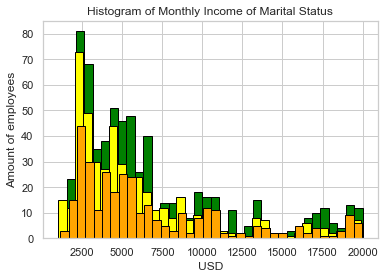

In [240]:
plt.hist(df_hr_g4['MonthlyIncome'], color = 'green', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g3['MonthlyIncome'], color = 'yellow', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g5['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Monthly Income of Marital Status')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что хотя количество объектов и отличаются (высота столбиков),
# в самих распределениях нет особых различий

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [241]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_inc'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.median(df_hr.MonthlyIncome) + 3*np.std(df_hr.MonthlyIncome),                 
                            1, 0)

In [243]:
df_anomally_inc = df_hr[df_hr['anomally_inc'] == 1]

df_anomally_inc

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_inc
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,Y,No,12,3,4,80,0,23,0,3,22,15,15,8,1
123,51,No,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,Y,No,13,3,3,80,0,23,5,3,20,18,15,15,1
165,50,No,Travel_Rarely,1452,Research & Development,11,3,Life Sciences,1,226,3,Female,53,3,5,Manager,2,Single,19926,17053,3,Y,No,15,3,2,80,0,21,5,3,5,4,4,4,1
190,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,Y,No,14,3,1,80,1,34,5,3,33,18,11,9,1
231,42,No,Travel_Rarely,532,Research & Development,4,2,Technical Degree,1,319,3,Male,58,3,5,Manager,4,Married,19232,4933,1,Y,No,11,3,4,80,0,22,3,3,22,17,11,15,1
233,50,No,Travel_Rarely,854,Sales,1,4,Medical,1,323,4,Female,68,3,5,Manager,4,Divorced,19517,24118,3,Y,No,11,3,3,80,1,32,3,2,7,0,0,6,1
237,52,No,Non-Travel,771,Sales,2,4,Life Sciences,1,329,1,Male,79,2,5,Manager,3,Single,19068,21030,1,Y,Yes,18,3,4,80,0,33,2,4,33,7,15,12,1
244,45,No,Travel_Rarely,252,Research & Development,1,3,Other,1,336,3,Male,70,4,5,Manager,4,Married,19202,15970,0,Y,No,11,3,3,80,1,25,2,3,24,0,1,7,1
257,40,No,Travel_Rarely,1416,Research & Development,2,2,Medical,1,352,1,Male,49,3,5,Research Director,3,Divorced,19436,5949,0,Y,No,19,3,4,80,1,22,5,3,21,7,3,9,1


In [244]:
print("Count of Anomally Monthly Income is {} ".format(len(df_anomally_inc)))

Count of Anomally Monthly Income is 48 


In [246]:
"""

Таким образом, у нас получилось 48 человек с очень высокой зарплатой.
Скорее всего это высшее руководство, топ-менеджмент компании


"""

'\n\nТаким образом, у нас получилось 48 человек с очень высокой зарплатой.\nСкорее всего это высшее руководство, топ-менеджмент компании\n\n\n'

## Оценка абсентеизма - количества отсутствий на рабочем месте

In [247]:

df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_inc
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.032653
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.177787
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


(array([419.,  84., 129.,  59.,  84., 165.,  86.,  49.,  19.,  21.,  58.,
         20.,  48.,  25.,  18.,  46.,  28.,  50.,  12.,  50.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <BarContainer object of 20 artists>)

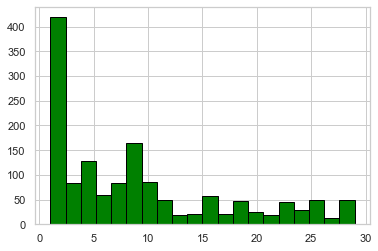

In [248]:
plt.hist(df_hr['DistanceFromHome'], color = 'green', edgecolor = 'black', bins = 20)


Из диаграммы видно, что многие сотрудники живут неподалеку. 

In [250]:
df_hr.DistanceFromHome.quantile(q=0.9)



23.0

90% живут в 23х км от работы

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Набор содержит информацию о 1470 сотрудниках.
2. 237 сотрудников являются бывшими, то есть на данный момент уже покинули компанию
3. Зарплаты между сотрудниками с разным семейным положением распределены более менее равномерно, явных искажений не наблюдается.
4. Аномальным значением является то, 48 человек имеют ультравысокий ежемесячный доход.
5. Уровень дохода чаще повышают людям с более высоким уровнем производительности


# Выводы по заданию

Что мы сейчас сделали: 
1. Загрузили датасет
2. Провели по нему ряд базовых проверок
3. Научились считать базовые вещи - медиану, стандартное отклонение, дисперсию etc
4. Научились рисовать базовые графички с распределениями
5. Начились дробить датасеты по условию (делать подвыборки)

# В домашке вас ждет

* Сделайте все тоже самое, но на примере другого набора данных. На выходе должны получится достоверные результаты разведочного исследования (как в части "Выводы по набору данных")
* Превращаем знания в навыки

## Pro tip: 

* В ходе выполнения домашки вам может потребоваться итерация вопрос-ответ с коллегами или преподавателем. Начинайте делать домашку заранее, чтобы оставить в запасе больше времени на итерации вопрос-ответов и прояснение ситуации. Это работает не только с домашками. 